# Voting Classifier 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

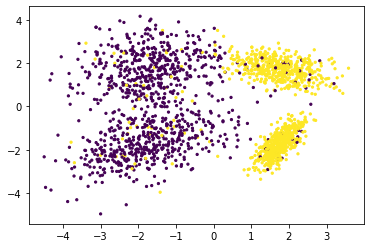

In [4]:
X, y = make_classification(n_samples=2_000, n_features=2,
                          n_redundant=0, random_state=21, 
                          class_sep=1.75, flip_y=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=5)

In [5]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X,y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='soft', weights=[0.5, 0.5])

In [6]:
clf3.fit(X,y)

VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=[0.5, 0.5])

In [12]:
def make_plot():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:,0]), np.max(X[:,0]), (20_000, 1)),
        np.random.uniform(np.min(X[:,1]), np.max(X[:,1]), (20_000, 1)),
    ], axis=1)
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    plt.scatter(X[:,0], X[:,1], c=y, s=5)
    plt.title('Original Data')
    
    plt.subplot(142)
    plt.scatter(X_new[:,0], X_new[:,1], c=clf1.predict_proba(X_new)[:,1], s=5)
    plt.title('ens1')
    
    plt.subplot(143)
    plt.scatter(X_new[:,0], X_new[:,1], c=clf2.predict_proba(X_new)[:,1], s=5)
    plt.title('ens2')
    
    plt.subplot(144)
    plt.scatter(X_new[:,0], X_new[:,1], c=clf3.predict_proba(X_new)[:,1], s=5)
    plt.title('ens3')

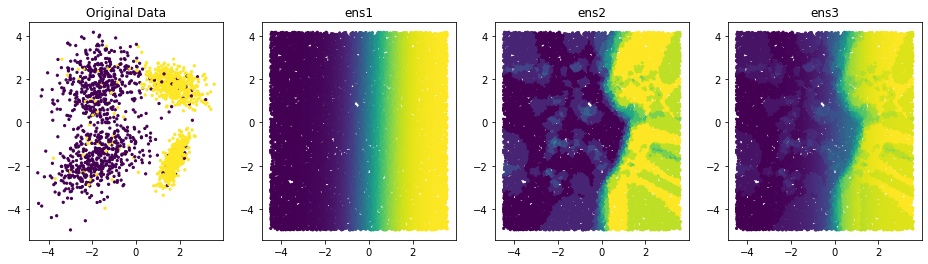

In [13]:
make_plot()